#Comparison of nWBV and ASF between Dementia Statuses as MRI Visits Increase
By: Bonnie Yam

In [30]:
#import the necessary libraries for data processing, visualizations, and statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
%pip install dfply
from dfply import *
%pip install pingouin
import pingouin as pg
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

In [31]:
#load the dataset about MRI results data
MRI_data = pd.read_csv('INF2178_A4_data.csv')

#rename the column "Group" to "Dementia Status"
MRI_data.columns = MRI_data.columns.str.replace('Subject ID', 'Patient ID')
MRI_data.columns = MRI_data.columns.str.replace('Group', 'Dementia Status')

#display the first 10 rows of the 'MRI_data' DataFrame
MRI_data.head(10)

#References:
#How to rename columns in Pandas DataFrame: Replace specific texts of column names using Dataframe.columns.str.replace function. (2023, December 4). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

,Unnamed: 0,Patient ID,MRI ID,Dementia Status,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [32]:
#display information about the 'MRI_data' DataFrame
MRI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       294 non-null    int64  
 1   Patient ID       294 non-null    object 
 2   MRI ID           294 non-null    object 
 3   Dementia Status  294 non-null    object 
 4   Visit            294 non-null    int64  
 5   MR Delay         294 non-null    int64  
 6   M/F              294 non-null    object 
 7   Hand             294 non-null    object 
 8   Age              294 non-null    int64  
 9   EDUC             294 non-null    int64  
 10  SES              279 non-null    float64
 11  MMSE             293 non-null    float64
 12  CDR              294 non-null    float64
 13  eTIV             294 non-null    int64  
 14  nWBV             294 non-null    float64
 15  ASF              294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [33]:
#find the number of patients in this experiment
print("Total number of patients: " + str(len(pd.unique(MRI_data['Patient ID']))))

#References:
#How to Count Distinct Values of a Pandas Dataframe Column: Count Distinct Values of a Column Using unique(). (2023, December 1). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

Total number of patients: 150


In [34]:
#find the youngest age
print("Youngest age: " + str(MRI_data['Age'].min()))
#find the oldest age
print("Oldest age: " + str(MRI_data['Age'].max()))

Youngest age: 60
Oldest age: 98


In [35]:
#filter the 'MRI_data' dataFrame when MR Delay is greater than 0
delay = MRI_data[MRI_data['MR Delay'] > 0]

#find the smallest gap (in days) between the 1st visit and 2nd visit
print("The least number of days between the 1st visit and 2nd visit: " + str(delay['MR Delay'].min()))

The least number of days between the 1st visit and 2nd visit: 182


In [36]:
#for each visit, find the number of patients who did MRI by dementia status and visit
patients_by_dementia = MRI_data.pivot_table(values = 'Patient ID', index = 'Dementia Status', columns = 'Visit', aggfunc = 'count')
#display patients_by_dementia table
patients_by_dementia

Visit,1,2
Dementia Status,,
Converted,14,12
Demented,64,62
Nondemented,72,70


In [37]:
#Get columns "Patient ID", "Group", "Visit", "CDR", and "nWBV". Then save it as a dataFrame 'MRI_results'
MRI_results = MRI_data[['Patient ID', 'Dementia Status', 'Visit', 'nWBV', 'ASF']]

#change the data type of the "Visit" column to a string
MRI_results['Visit'] = MRI_results['Visit'].astype(str)

#create a new column "Group" which states the dementia status and visit #
MRI_results['Group'] = MRI_results['Dementia Status'] + "_visit" + MRI_results['Visit']

#display the first 10 rows of the 'MRI_results' DataFrame
MRI_results.head(10)

<ipython-input-37-6c19635f787a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRI_results['Visit'] = MRI_results['Visit'].astype(str)
<ipython-input-37-6c19635f787a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRI_results['Group'] = MRI_results['Dementia Status'] + "_visit" + MRI_results['Visit']


,Patient ID,Dementia Status,Visit,nWBV,ASF,Group
0,OAS2_0001,Nondemented,1,0.696,0.883,Nondemented_visit1
1,OAS2_0001,Nondemented,2,0.681,0.876,Nondemented_visit2
2,OAS2_0002,Demented,1,0.736,1.046,Demented_visit1
3,OAS2_0002,Demented,2,0.713,1.010,Demented_visit2
4,OAS2_0004,Nondemented,1,0.710,1.444,Nondemented_visit1
5,OAS2_0004,Nondemented,2,0.718,1.462,Nondemented_visit2
6,OAS2_0005,Nondemented,1,0.712,1.039,Nondemented_visit1
7,OAS2_0005,Nondemented,2,0.711,1.032,Nondemented_visit2
8,OAS2_0007,Demented,1,0.748,1.293,Demented_visit1
9,OAS2_0008,Nondemented,1,0.698,1.380,Nondemented_visit1


## Normalize Whole Brain Volume (nWBV) Analysis

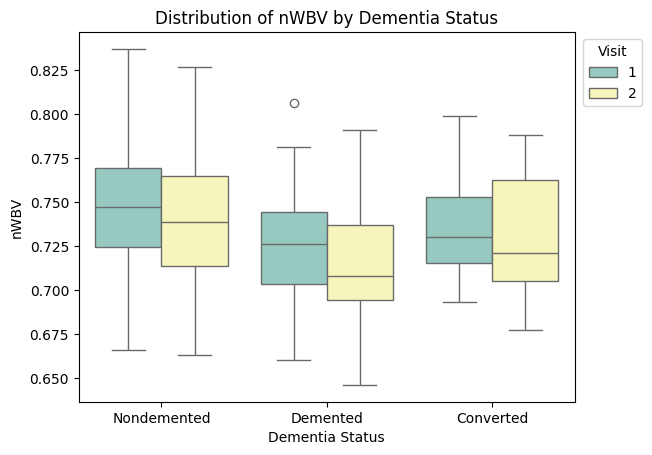

In [38]:
#visualize the distribution of nWBV by dementia status in a boxplot
sns.boxplot(x = 'Dementia Status', y = 'nWBV', hue = 'Visit', data = MRI_results, palette = 'Set3')

#set plot title
plt.title("Distribution of nWBV by Dementia Status")

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Visit', bbox_to_anchor = (1.15, 1)) #(reference 1)

#References:
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [39]:
#filter the 'MRI_results' dataFrame when Visit = 1
first_visit_data = MRI_results[MRI_results.Visit == '1']


#display summary statistics of nWBV from the 1st visit
print("Summary Statistics of nWBV from 1st Visit")
first_visit_data >> group_by(X['Dementia Status']) >> summarize(mean = X['nWBV'].mean(), std = X['nWBV'].std(), min = X['nWBV'].min(),
                                                                 max = X['nWBV'].max(), q1 = X['nWBV'].quantile(0.25),
                                                                 median = X['nWBV'].median(), q3 = X['nWBV'].quantile(0.75),
                                                                 IQR = X['nWBV'].quantile(0.75) - X['nWBV'].quantile(0.25))

Summary Statistics of nWBV from 1st Visit


,Dementia Status,mean,std,min,max,q1,median,q3,IQR
0,Converted,0.737786,0.033011,0.693,0.799,0.71525,0.730,0.75300,0.03775
1,Demented,0.724391,0.031353,0.660,0.806,0.70325,0.726,0.74425,0.04100
2,Nondemented,0.746125,0.038621,0.666,0.837,0.72450,0.747,0.76950,0.04500


In [40]:
#filter the 'MRI_results' dataFrame when Visit = 2
second_visit_data = MRI_results[MRI_results.Visit == '2']


#display summary statistics of nWBV from the 2nd visit
print("Summary Statistics of nWBV from 2nd Visit")
second_visit_data  >> group_by(X['Dementia Status']) >> summarize(mean = X['nWBV'].mean(), std = X['nWBV'].std(), min = X['nWBV'].min(),
                                                                 max = X['nWBV'].max(), q1 = X['nWBV'].quantile(0.25),
                                                                 median = X['nWBV'].median(), q3 = X['nWBV'].quantile(0.75),
                                                                 IQR = X['nWBV'].quantile(0.75) - X['nWBV'].quantile(0.25))

Summary Statistics of nWBV from 2nd Visit


,Dementia Status,mean,std,min,max,q1,median,q3,IQR
0,Converted,0.728417,0.036140,0.677,0.788,0.7050,0.7210,0.76275,0.05775
1,Demented,0.713500,0.033462,0.646,0.791,0.6940,0.7080,0.73675,0.04275
2,Nondemented,0.737671,0.038549,0.663,0.827,0.7135,0.7385,0.76500,0.05150


<ipython-input-41-e8d51f8d989c>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data = MRI_results, x = 'Dementia Status', y = 'nWBV', hue = 'Visit', dodge = True, markers=['o', 's'],


Text(0, 0.5, 'Mean of nWBV')

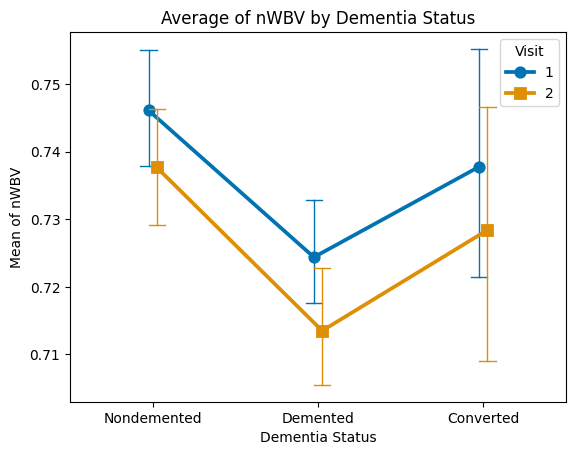

In [41]:
#create an output plot of nWBV by visit and dementia status
sns.pointplot(data = MRI_results, x = 'Dementia Status', y = 'nWBV', hue = 'Visit', dodge = True, markers=['o', 's'],
	      capsize = .1, errwidth = 1, palette = 'colorblind')

#set plot title
plt.title("Average of nWBV by Dementia Status")

#set y-axis label
plt.ylabel('Mean of nWBV')

In [42]:
#check normality using the Shapiro Wilk test
pg.normality(data = MRI_results, dv = 'nWBV', group = 'Group')

,W,pval,normal
Group,,,
Nondemented_visit1,0.988723,0.771999,True
Nondemented_visit2,0.983956,0.510883,True
Demented_visit1,0.992007,0.954626,True
Demented_visit2,0.979475,0.384691,True
Converted_visit1,0.933507,0.341468,True
Converted_visit2,0.940329,0.502351,True


In [43]:
#check sphericity using Mauchly's test of sphericity
pg.sphericity(data = MRI_results, dv = 'nWBV', subject = 'Patient ID', within = 'Visit')[-1]

1.0

In [44]:
#check homoscedasticity using Levene's test

#check homoscedasticity for visit 1
pg.homoscedasticity(MRI_results[MRI_results.Visit == '1'], dv = 'nWBV', group = 'Dementia Status')

,W,pval,equal_var
levene,1.045199,0.35422,True


In [45]:
#check homoscedasticity for visit 2
pg.homoscedasticity(MRI_results[MRI_results.Visit == '2'], dv = 'nWBV', group = 'Dementia Status')

#Reference:
#https://pingouin-stats.org/build/html/generated/pingouin.homoscedasticity.html

,W,pval,equal_var
levene,0.298582,0.742338,True


In [46]:
#compute the two-way mixed-design ANOVA with nWBV as the dependent variable, visit as the within-subject factor,
#and dementia status as the between-subject factor
aov = pg.mixed_anova(dv = 'nWBV', within = 'Visit', between = 'Dementia Status', subject = 'Patient ID', data = MRI_results)
#print ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2     MS       F    p-unc    np2      eps
---------------  -----  -----  -----  -----  ------  -------  -----  -------
Dementia Status  0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit            0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction      0.000      2    141  0.000   1.534    0.219  0.021  nan



## Atlas Scaling Factor (ASF) Analysis

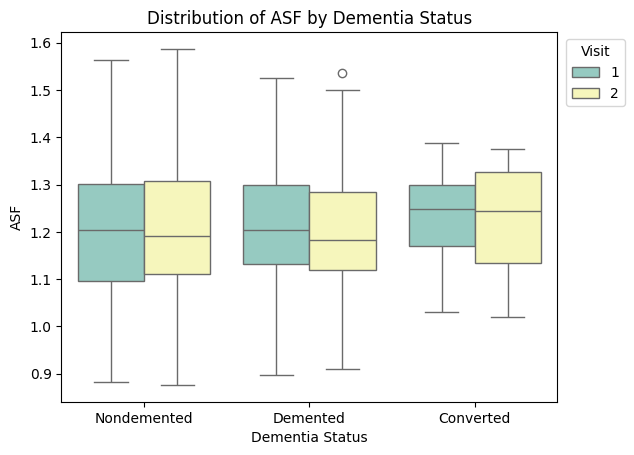

In [47]:
#visualize the distribution of ASF by dementia status in a boxplot
sns.boxplot(x = 'Dementia Status', y = 'ASF', hue = 'Visit', data = MRI_results, palette = 'Set3')

#set plot title
plt.title("Distribution of ASF by Dementia Status")

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Visit', bbox_to_anchor = (1.15, 1)) #(reference 1)

#References:
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [48]:
#using the 'first_visit_data" dataFrame, display summary statistics of ASF from the 1st visit
print("Summary Statistics of ASF from 1st Visit")
first_visit_data >> group_by(X['Dementia Status']) >> summarize(mean = X['ASF'].mean(), std = X['ASF'].std(), min = X['ASF'].min(),
                                                                 max = X['ASF'].max(), q1 = X['ASF'].quantile(0.25),
                                                                 median = X['ASF'].median(), q3 = X['ASF'].quantile(0.75),
                                                                 IQR = X['ASF'].quantile(0.75) - X['ASF'].quantile(0.25))

Summary Statistics of ASF from 1st Visit


,Dementia Status,mean,std,min,max,q1,median,q3,IQR
0,Converted,1.229429,0.108862,1.030,1.388,1.17050,1.2490,1.29900,0.12850
1,Demented,1.204719,0.136852,0.897,1.525,1.13225,1.2035,1.29850,0.16625
2,Nondemented,1.203278,0.144851,0.883,1.563,1.09575,1.2045,1.30025,0.20450


In [49]:
#using the 'second_visit_data" dataFrame, display summary statistics of ASF from the 1st visit
print("Summary Statistics of ASF from 2nd Visit")
second_visit_data >> group_by(X['Dementia Status']) >> summarize(mean = X['ASF'].mean(), std = X['ASF'].std(), min = X['ASF'].min(),
                                                                 max = X['ASF'].max(), q1 = X['ASF'].quantile(0.25),
                                                                 median = X['ASF'].median(), q3 = X['ASF'].quantile(0.75),
                                                                 IQR = X['ASF'].quantile(0.75) - X['ASF'].quantile(0.25))

Summary Statistics of ASF from 2nd Visit


,Dementia Status,mean,std,min,max,q1,median,q3,IQR
0,Converted,1.225000,0.121834,1.019,1.376,1.13350,1.2440,1.32750,0.19400
1,Demented,1.192742,0.139569,0.910,1.535,1.12000,1.1835,1.28475,0.16475
2,Nondemented,1.201629,0.147106,0.876,1.587,1.10975,1.1915,1.30825,0.19850


<ipython-input-50-68e1f2991ea4>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data = MRI_results, x = 'Dementia Status', y = 'ASF', hue = 'Visit', dodge = True, markers=['o', 's'],


Text(0, 0.5, 'Mean of ASF')

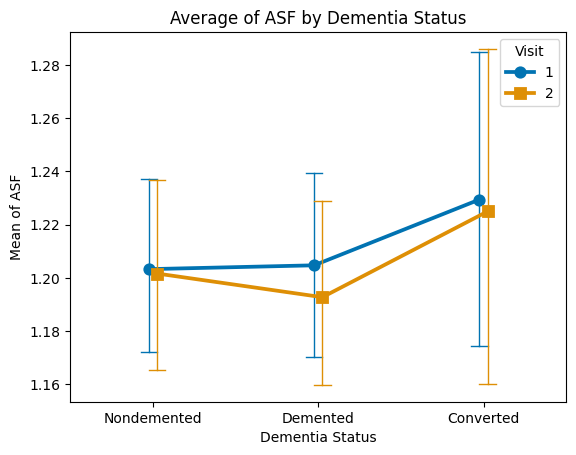

In [50]:
#create an output plot of ASF by dementia status and visit
sns.pointplot(data = MRI_results, x = 'Dementia Status', y = 'ASF', hue = 'Visit', dodge = True, markers=['o', 's'],
	      capsize = .1, errwidth = 1, palette = 'colorblind')

#set plot title
plt.title("Average of ASF by Dementia Status")

#set y-axis label
plt.ylabel('Mean of ASF')

In [51]:
#check normality using the Shapiro Wilk test
pg.normality(data = MRI_results, dv = 'ASF', group = 'Group')

,W,pval,normal
Group,,,
Nondemented_visit1,0.989508,0.816622,True
Nondemented_visit2,0.992769,0.960823,True
Demented_visit1,0.986235,0.696870,True
Demented_visit2,0.982480,0.519384,True
Converted_visit1,0.957046,0.674286,True
Converted_visit2,0.932284,0.404957,True


In [52]:
#check sphericity using Mauchly's test of sphericity
pg.sphericity(data = MRI_results, dv = 'ASF', subject = 'Patient ID', within = 'Visit')[-1]

1.0

In [53]:
#check homoscedasticity using Levene's test

#check homoscedasticity for visit 1
pg.homoscedasticity(MRI_results[MRI_results.Visit == '1'], dv = 'ASF', group = 'Dementia Status')

,W,pval,equal_var
levene,0.879076,0.417337,True


In [54]:
#check homoscedasticity for visit 2
pg.homoscedasticity(MRI_results[MRI_results.Visit == '2'], dv = 'ASF', group = 'Dementia Status')

,W,pval,equal_var
levene,0.391774,0.67659,True


In [55]:
#compute the two-way mixed-design ANOVA with ASF as the dependent variable, visit as the within-subject factor,
#and dementia status as the between-subject factor
aov = pg.mixed_anova(dv = 'ASF', within = 'Visit', between = 'Dementia Status', subject = 'Patient ID', data = MRI_results)
#print ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2     MS      F    p-unc    np2      eps
---------------  -----  -----  -----  -----  -----  -------  -----  -------
Dementia Status  0.018      2    141  0.009  0.234    0.792  0.003  nan
Visit            0.003      1    141  0.003  8.754    0.004  0.058    1.000
Interaction      0.001      2    141  0.000  1.028    0.361  0.014  nan



## Statistical Power Analysis

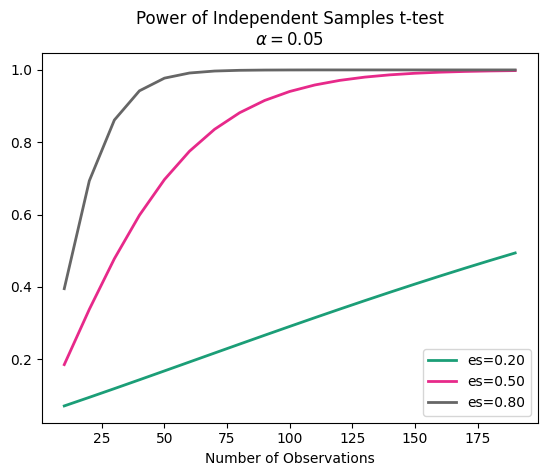

In [56]:
power_analysis = smp.TTestIndPower()

#varying parameters for effect size
effect_sizes = np.array([0.2, 0.5, 0.8])
#varying parameters for sample size
sample_sizes = np.array(range(10, 200, 10))

#plot the power curves
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(dep_var = 'nobs', nobs = sample_sizes, effect_size = effect_sizes, alpha = 0.05,
                                ax = ax, title = 'Power of Independent Samples t-test\n$\\alpha = 0.05$')

In [57]:
#find the appropriate sample size for a theoretical experiment with power = 0.91, alpha = 0.05, and effect size = 0.7
sample_size = power_analysis.solve_power(effect_size = 0.7, power = 0.91, alpha = 0.05)
sample_size

45.45073088568012